<a href="https://colab.research.google.com/github/mehakhafeez/NLPprojectweek6/blob/main/NLPProjectT5Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
pip install textblob nltk rouge-score

In [112]:
pip install rouge-score

In [113]:
pip install transformers==4.23.0

In [114]:
pip install sentencepiece==0.1.96

In [115]:
pip install transformers datasets torch

In [116]:
pip install rouge

Importing Necessary Libraries

Import libraries for data manipulation, machine learning models, visualization, and text processing.

In [117]:
import pandas as pd
import numpy as np
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report)
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from transformers import (DistilBertTokenizer, DistilBertForSequenceClassification,
                          Trainer, TrainingArguments)
from torch.utils.data import DataLoader
from torch.optim import AdamW
from textblob import TextBlob
from rouge import Rouge
import re
import nltk
from transformers import T5Tokenizer, T5ForConditionalGeneration
from nltk.translate.bleu_score import sentence_bleu

In [118]:
# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [119]:
df1 = pd.read_csv('/content/1429_1.csv', quoting=3, on_bad_lines='skip')
# quoting=3 tells pandas to use the QUOTE_NONE strategy. This means that pandas will not treat any character as a quote character. This way if there are unclosed quotes, it ignores them.
# on_bad_lines='skip' replaces the deprecated 'error_bad_lines=False' to skip bad lines.
df2 = pd.read_csv('/content/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv', quoting=3, on_bad_lines='skip')
df3 = pd.read_csv('/content/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv', quoting=3, on_bad_lines='skip')

In [120]:
# Combine datasets into one
df = pd.concat([df1, df2, df3], ignore_index=True)

In [121]:
# Preprocess the text (remove stopwords, special characters, etc.)
def preprocess_text(text):
    # Check if the text is a string before processing
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'\d+', '', text)
        text = re.sub(r'[^\w\s]', '', text)
        text = ' '.join([word for word in text.split() if word not in nltk.corpus.stopwords.words('english')])
        return text
    # If not a string (e.g., float), return it as is or handle it differently
    else:
        return str(text)  # Or handle NaN values appropriately

In [122]:
# Assuming the correct column name for reviews is 'reviews.text' based on later usage
df['review_clean'] = df['reviews.text'].apply(preprocess_text)

In [123]:
# Data Cleaning
data = data.drop_duplicates()
data = data.dropna(subset=['reviews.text'])
data['reviews.text'] = data['reviews.text'].str.strip()
data['reviews.text'] = data['reviews.text'].str.replace(r'[^a-zA-Z\s]', '', regex=True)

Using TextBlob to assign sentiment labels ('positive', 'neutral', or 'negative') to each review based on its polarity.

In [124]:
# Sentiment Analysis with TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

data['sentiment'] = data['reviews.text'].apply(get_sentiment)

In [125]:
# Display the first few rows of the dataset with the new 'sentiment' column
print(data[['reviews.text', 'sentiment']].head(10))

                                        reviews.text sentiment
0  This product so far has not disappointed My ch...  positive
1  great for beginner or experienced person Bough...  positive
2  Ive had my Fire HD  two weeks now and I love i...  positive
3  This amazon fire  inch tablet is the perfect s...  positive
4  I love ordering books and reading them with th...  positive
5  Not easy for elderly users cease of ads that p...  negative
6  Wanted my father to have his first tablet and ...  positive
7  Simply does everything I need Thank youAnd sil...   neutral
8  Got it as a present and love the size of the s...  positive
9  nice reader almost perfect for what i wantneed...  positive


Data Preparation for Machine Learning
Splitting data into features (X) and labels (y), followed by a train-test split.
Also encoding sentiment labels into numeric values: positive=2, neutral=1, negative=0.


In [126]:
# Sentiment Evaluation
X = data['reviews.text']
y = data['sentiment']


In [127]:
# Encode sentiments
y = y.map({'positive': 2, 'neutral': 1, 'negative': 0})

In [128]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Text Vectorization
 Converting the textual data into numeric representations using TF-IDF (Term Frequency-Inverse Document Frequency).


In [129]:
# Feature extraction
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


Logistic Regression Model

Training a Logistic Regression model and evaluating its performance.
Logistic Regression Evaluation
Computing metrics (accuracy, precision, recall, F1-score) for Logistic Regression.
Displaying a confusion matrix to visualize the classification performance.


In [130]:
# Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train_vec, y_train)

y_pred_lr = lr_model.predict(X_test_vec)

In [131]:
# Evaluation Metrics for Logistic Regression
print("Logistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_lr, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred_lr, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Evaluation:
Accuracy: 0.9576719576719577
Precision: 0.9482518478887404
Recall: 0.9576719576719577
F1-Score: 0.9516812438204206
Confusion Matrix:
 [[  0   0  18]
 [  0 790  37]
 [  0   1 477]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       1.00      0.96      0.98       827
           2       0.90      1.00      0.94       478

    accuracy                           0.96      1323
   macro avg       0.63      0.65      0.64      1323
weighted avg       0.95      0.96      0.95      1323



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

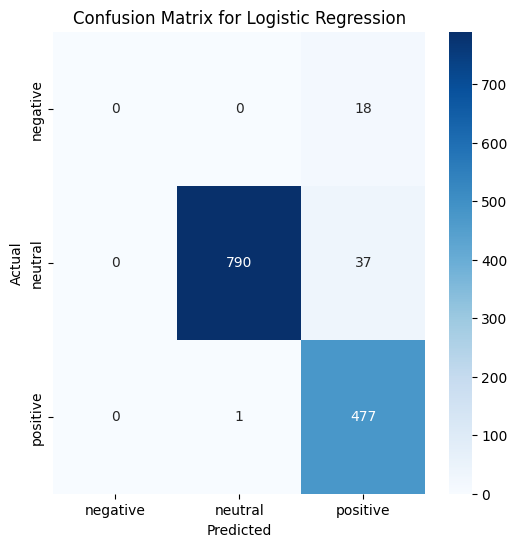

In [132]:
# Confusion Matrix Plot for Logistic Regression
plt.figure(figsize=(6, 6))
sns.heatmap(
    confusion_matrix(y_test, y_pred_lr),
    annot=True, fmt="d", cmap="Blues", xticklabels=["negative", "neutral", "positive"],
    yticklabels=["negative", "neutral", "positive"]
)
plt.title("Confusion Matrix for Logistic Regression")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Naive Bayes Model

Training a Naive Bayes model and evaluating its performance.
Naive Bayes Evaluation
Computing metrics (accuracy, precision, recall, F1-score) for Naive Bayes.
Displaying a confusion matrix to visualize the classification performance.


In [133]:
# Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

y_pred_nb = nb_model.predict(X_test_vec)

In [134]:
# Evaluation Metrics for Naive Bayes
print("Naive Bayes Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Precision:", precision_score(y_test, y_pred_nb, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_nb, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred_nb, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes Evaluation:
Accuracy: 0.9622071050642479
Precision: 0.9520158975857774
Recall: 0.9622071050642479
F1-Score: 0.9560690629227008
Confusion Matrix:
 [[  0   1  17]
 [  0 795  32]
 [  0   0 478]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       1.00      0.96      0.98       827
           2       0.91      1.00      0.95       478

    accuracy                           0.96      1323
   macro avg       0.64      0.65      0.64      1323
weighted avg       0.95      0.96      0.96      1323



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

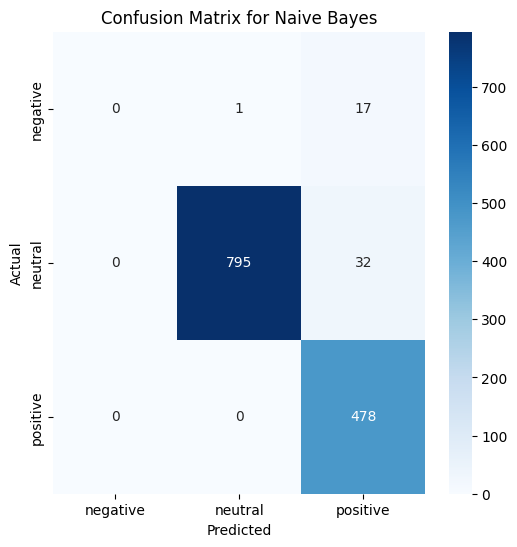

In [135]:
# Confusion Matrix Plot for Naive Bayes
plt.figure(figsize=(6, 6))
sns.heatmap(
    confusion_matrix(y_test, y_pred_nb),
    annot=True, fmt="d", cmap="Blues", xticklabels=["negative", "neutral", "positive"],
    yticklabels=["negative", "neutral", "positive"]
)
plt.title("Confusion Matrix for Naive Bayes")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

KMeans Clustering

Using PCA to reduce dimensionality for visualization.
Clustering reviews into 3 groups using KMeans and visualizing them in a 2D space.


In [136]:
# Task 2: Product Category Clustering using KMeans (Updated to 5 clusters)
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(df['review_clean'])

In [137]:
# KMeans Clustering
pca = PCA(n_components=2)
# Fit PCA on the entire dataset's TF-IDF representation
X_pca = pca.fit_transform(vectorizer.transform(data['reviews.text']).toarray())

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_pca)

KMeans(n_clusters=5, random_state=42)

In [138]:
# Assign clusters to data
data['cluster'] = kmeans.predict(X_pca) # Use X_pca directly for prediction

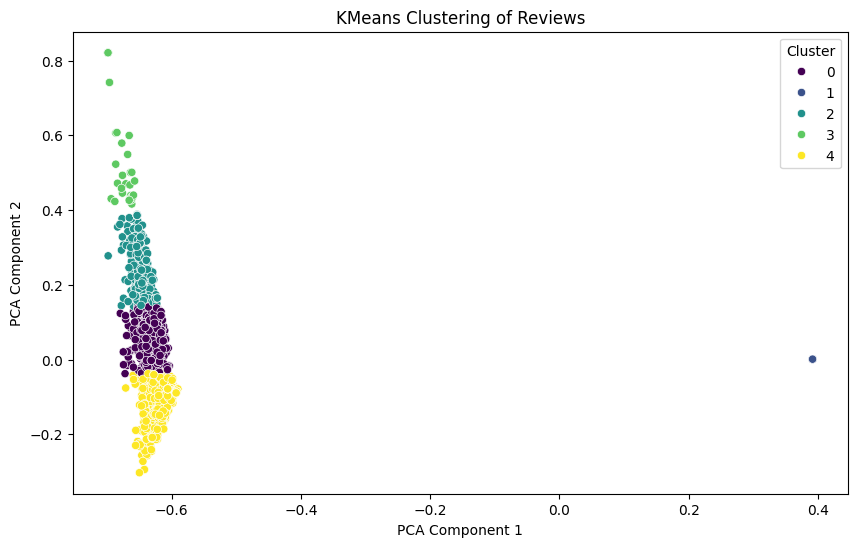

In [139]:
# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans.labels_, palette='viridis')
plt.title("KMeans Clustering of Reviews")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

In [140]:
# PCA for Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf.toarray())
df['pca1'] = X_pca[:, 0]
df['pca2'] = X_pca[:, 1]
df['cluster'] = data['cluster']

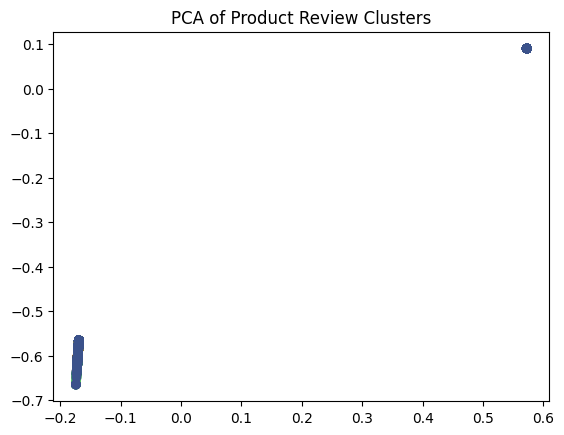

In [141]:
# Visualize Clusters
import matplotlib.pyplot as plt
plt.scatter(df['pca1'], df['pca2'], c=df['cluster'])
plt.title('PCA of Product Review Clusters')
plt.show()

In [142]:
# Cluster analysis: Print sample reviews for each cluster
for i in range(4):
    print(f"\nCluster {i} Sample Reviews:")
    cluster_data = data[data['cluster'] == i]
    print(cluster_data['reviews.text'].head(5))


Cluster 0 Sample Reviews:
1     great for beginner or experienced person Bough...
2     Ive had my Fire HD  two weeks now and I love i...
3     This amazon fire  inch tablet is the perfect s...
6     Wanted my father to have his first tablet and ...
10    I really like this tablet I would have given  ...
Name: reviews.text, dtype: object

Cluster 1 Sample Reviews:
2724    httpswwwamazoncomAmazonBasicsPerformanceAlkali...
2725    httpswwwamazoncomAmazonBasicsPerformanceAlkali...
2726    httpswwwamazoncomAmazonBasicsPerformanceAlkali...
2727    httpswwwamazoncomAmazonBasicsPerformanceAlkali...
2728    httpswwwamazoncomAmazonBasicsPerformanceAlkali...
Name: reviews.text, dtype: object

Cluster 2 Sample Reviews:
14    I purchased this when my last tablet died It m...
18    Works great Love the portability of books Over...
24    Great tablet fast screen good size never gives...
47    Amazing tablet with fast processor It looks gr...
60    Great tablet but apps limited comparison of ot...
N

Fine-Tuning T5 model

Using ModelT5 for generating product reviews or summarizing prompting and fine-tuning DistilBERT for sentiment classification.


In [143]:
# Task 3: Generative AI for Review Summarization and Product Recommendation (using T5)
# Fine-tune T5 for generating product reviews or summarizing
tokenizer = T5Tokenizer.from_pretrained('t5-small')
model = T5ForConditionalGeneration.from_pretrained('t5-small')

def generate_summary(text, max_length=150):
    input_text = f"summarize: {text}"
    inputs = tokenizer(input_text, return_tensors="pt", max_length=512, truncation=True)
    summary_ids = model.generate(inputs['input_ids'], max_length=max_length, num_beams=4, length_penalty=2.0, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [144]:
# Generate summary for a product category
sample_reviews = df[df['cluster'] == 0]['review_clean'].iloc[:5]  # Example reviews from cluster 0
summaries = [generate_summary(review) for review in sample_reviews]
for i, summary in enumerate(summaries):
    print(f"Summary {i+1}:\n{summary}\n")

Summary 1:
great beginner experienced person bought gift loves. great beginner experienced person bought gift loves.

Summary 2:
ive fire hd two weeks love tablet great valuewe prime members tablet shines love able easily access prime content well movies download watch laterthis screen really nice look nice crisp bright infact brighter ipad pro costing base model build fire insanely awesome running mm thick smooth glossy feel back really amazing hold like futuristic tab ur hands.

Summary 3:
amazon fire inch tablet perfect size purchased husband bigger screen phone gotten one years ago knew would good purchase. amazon fire inch tablet perfect size.

Summary 4:
wanted father first tablet good value watch movies play games easy enough use. wanted father first tablet good value watch movies play games easy enough use.

Summary 5:
like tablet would given stars sometimes push start several times unlock screen little annoying.



In [145]:
# Task 4: Evaluation using Rouge and BLEU for Generative Model
def evaluate_generative_model(generated_summary, reference_summary):
    # ROUGE Score
    rouge = Rouge()
    rouge_score = rouge.get_scores(generated_summary, reference_summary)
    print("ROUGE Score: ", rouge_score)

    # BLEU Score
    reference = reference_summary.split()
    generated = generated_summary.split()
    bleu_score = sentence_bleu([reference], generated)
    print(f"BLEU Score: {bleu_score}")

In [146]:
# Example of evaluating the summary
generated_summary = summaries[0]
reference_summary = "This is a product review summary with details about its quality, price, and usage."
evaluate_generative_model(generated_summary, reference_summary)

ROUGE Score:  [{'rouge-1': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-l': {'r': 0.0, 'p': 0.0, 'f': 0.0}}]
BLEU Score: 0


In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration, Trainer, TrainingArguments
from datasets import Dataset

import os
os.environ["WANDB_DISABLED"] = "true"

# Specify a local cache directory to store the model files
model_path = "./local_models/t5-small"

# Download and cache the model and tokenizer
model = T5ForConditionalGeneration.from_pretrained("t5-small", cache_dir=model_path)
tokenizer = T5Tokenizer.from_pretrained("t5-small", cache_dir=model_path)

print(f"Model and tokenizer downloaded to {model_path}")

# Continue with the rest of your code for fine-tuning and summarization

# Create synthetic summaries by truncating reviews (just for demonstration)
def create_synthetic_summary(review_text, max_length=100):
    # Truncate the review text to simulate a summary
    return review_text[:max_length] + "..."

# Create synthetic summaries for each review
df['summary'] = df['review_clean'].apply(create_synthetic_summary)

# Now, we can proceed with preparing the dataset for fine-tuning
train_data = df[['review_clean', 'summary']]

# Convert to HuggingFace Dataset format
from datasets import Dataset
dataset = Dataset.from_pandas(train_data)

# Tokenization function for the dataset
def tokenize_function(examples):
    # Tokenize both the input and target texts
    inputs = tokenizer(examples['review_clean'], padding="max_length", truncation=True, return_tensors="pt")
    targets = tokenizer(examples['summary'], padding="max_length", truncation=True, return_tensors="pt")

    # Update the inputs dictionary with the target labels
    inputs['labels'] = targets['input_ids']
    return inputs

# Tokenize the dataset
dataset = dataset.map(tokenize_function, batched=True)

# Define training arguments for fine-tuning
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
)

# Initialize Trainer with model, arguments, and dataset
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset,
    eval_dataset=dataset,
)

# Fine-tune the model
trainer.train()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
loading configuration file config.json from cache at ./local_models/t5-small/models--t5-small/snapshots/df1b051c49625cf57a3d0d8d3863ed4d13564fe4/config.json
Model config T5Config {
  "architectures": [
    "T5ForConditionalGeneration"
  ],
  "d_ff": 2048,
  "d_kv": 64,
  "d_model": 512,
  "decoder_start_token_id": 0,
  "dense_act_fn": "relu",
  "dropout_rate": 0.1,
  "eos_token_id": 1,
  "feed_forward_proj": "relu",
  "initializer_factor": 1.0,
  "is_encoder_decoder": true,
  "is_gated_act": false,
  "layer_norm_epsilon": 1e-06,
  "model_type": "t5",
  "n_positions": 512,
  "num_decoder_layers": 6,
  "num_heads": 8,
  "num_layers": 6,
  "output_past": true,
  "pad_token_id": 0,
  "relative_attention_max_dist

Model and tokenizer downloaded to ./local_models/t5-small


Map:   0%|          | 0/18893 [00:00<?, ? examples/s]

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
The following columns in the training set don't have a corresponding argument in `T5ForConditionalGeneration.forward` and have been ignored: review_clean, summary. If review_clean, summary are not expected by `T5ForConditionalGeneration.forward`,  you can safely ignore this message.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW

Step,Training Loss
10,14.574400
20,13.471600
30,12.872200
40,12.133800
50,12.218100
60,12.149000
70,11.156900
80,10.255600
90,9.654800
100,8.126700


In [ ]:
def generate_summary(text, max_length=150):
    input_text = f"summarize: {text}"
    inputs = tokenizer(input_text, return_tensors="pt", max_length=512, truncation=True)
    summary_ids = model.generate(inputs['input_ids'], max_length=max_length, num_beams=4, length_penalty=2.0, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

# Example of generating summaries after fine-tuning
sample_reviews = df[df['cluster'] == 0]['review_clean'].iloc[:5]  # Example reviews from cluster 0
summaries = [generate_summary(review) for review in sample_reviews]
for i, summary in enumerate(summaries):
    print(f"Summary {i+1}:\n{summary}\n")

In [ ]:
from rouge import Rouge
from nltk.translate.bleu_score import sentence_bleu

# Function to evaluate ROUGE and BLEU for generated summaries
def evaluate_generative_model(generated_summary, reference_summary):
    # ROUGE Score
    rouge = Rouge()
    rouge_score = rouge.get_scores(generated_summary, reference_summary)
    print("ROUGE Score: ", rouge_score)

    # BLEU Score
    reference = reference_summary.split()
    generated = generated_summary.split()
    bleu_score = sentence_bleu([reference], generated)
    print(f"BLEU Score: {bleu_score}")

# Evaluate the summaries generated after fine-tuning
for i, summary in enumerate(summaries):
    print(f"Evaluating Summary {i+1}:\n")
    reference_summary = "This is a product review summary with details about its quality, price, and usage."  # Example reference
    evaluate_generative_model(summary, reference_summary)
    print("\n")